# Data exploration

In [1]:
pwd

'/Users/ericwulff/Documents/LTH/Examensarbete/lth_thesis_project'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

import matplotlib as mpl
import my_matplotlib_style as ms
mpl.rc_file('my_matplotlib_rcparams')

In [3]:
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

## Leading jets

In [4]:
# Loading leading jet data
path_to_processed_data = 'processed_data/'

train = pd.read_pickle(path_to_processed_data + 'train.pkl')
test = pd.read_pickle(path_to_processed_data + 'test.pkl')
print(len(train))
train = train[(train['pT'] < 10000)]
test = test[(test['pT'] < 10000)]
print(len(train))

1550321
1550319


In [5]:
ls processed_data/aod

all_jets_full_test.pkl
all_jets_partial_test.pkl
all_jets_partial_test_10percent.pkl
all_jets_partial_test_20percent.pkl
all_jets_partial_test_5percent.pkl
all_jets_partial_train.pkl
all_jets_partial_train_10percent.pkl
all_jets_partial_train_20percent.pkl
all_jets_partial_train_5percent.pkl
custom_normalized_test_10percent.pkl
custom_normalized_train_10percent.pkl
full_test.pkl
full_train.pkl
mc_1.pkl
partial_test.pkl
partial_train.pkl
scaled_all_jets_partial_test.pkl
scaled_all_jets_partial_test_10percent.pkl
scaled_all_jets_partial_train.pkl
scaled_all_jets_partial_train_10percent.pkl


In [6]:
train.shape

(1550319, 4)

In [7]:
test.shape

(387581, 4)

In [8]:
(1195193 + 10756729) * .2


2390384.4

In [9]:
print(train.shape, test.shape)

(1550319, 4) (387581, 4)


In [10]:
train.head() 

,pT,eta,phi,E
1367643,300.752869,0.118391,-1.460827,303.719818
1739612,79.819145,4.535507,-1.185196,3722.832764
546066,220.472305,1.314261,-0.943992,440.195190
213212,74.533775,0.010658,-0.424795,74.770332
150544,220.668121,2.432910,-2.308348,1266.681030


In [11]:
def plot_data(data, e_range=None, pt_range=None, save=False, title=True, logy=False):

    plt.figure()
    plt.hist(data['pT'], bins=100, range=pt_range)
    plt.xlabel(r'$p_T$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if logy:
        plt.yscale('log')
    if save:
        plt.savefig('data_exploration_figures/hist_pt_train.png')
    
    plt.figure()
    plt.hist(data['eta'], bins=100)
    plt.xlabel(r'$\eta$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if save:
        plt.savefig('data_exploration_figures/hist_eta_train.png')
    
    plt.figure()
    plt.hist(data['phi'], bins=100)
    plt.xlabel(r'$\phi$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if save:
        plt.savefig('data_exploration_figures/hist_phi_train.png')    
        
    plt.figure()
    plt.hist(data['E'], bins=100, range=e_range)
    plt.xlabel(r'$E$')
    if title:
        plt.suptitle('Train set')
    plt.ylabel('Number of jets')
    ms.sciy()
    if logy:
        plt.yscale('log')
    if save:
        plt.savefig('data_exploration_figures/hist_E_train.png')

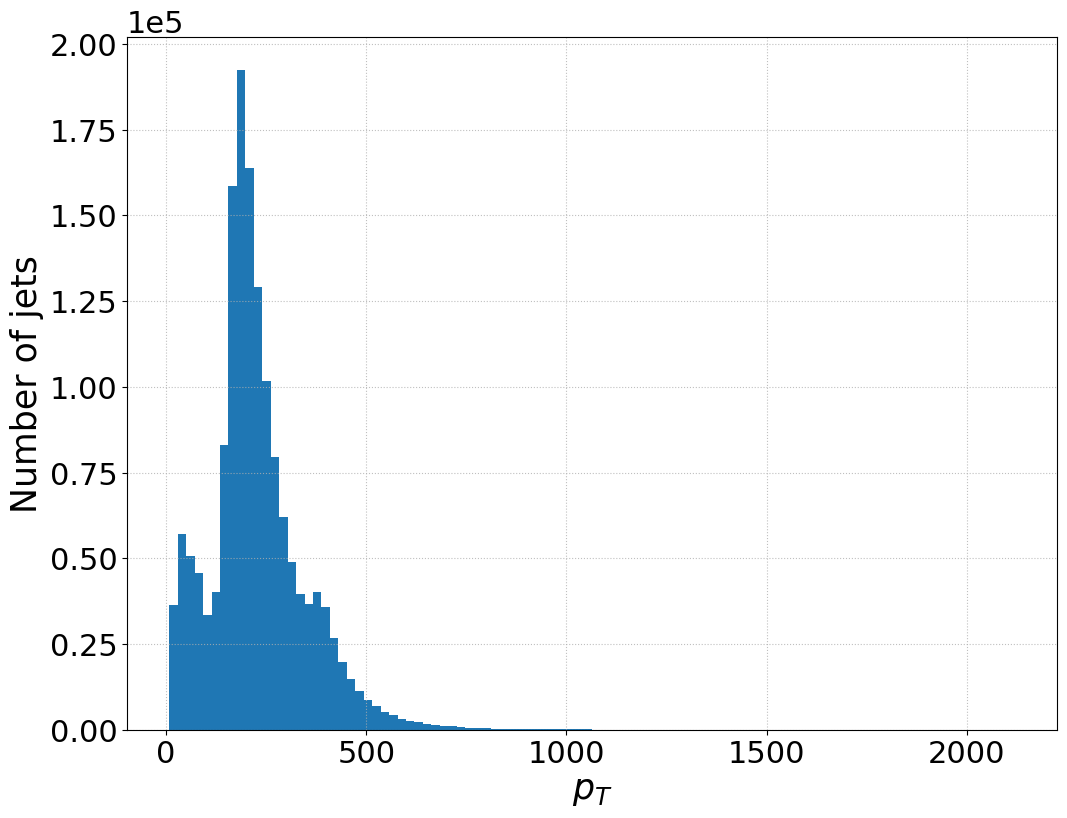

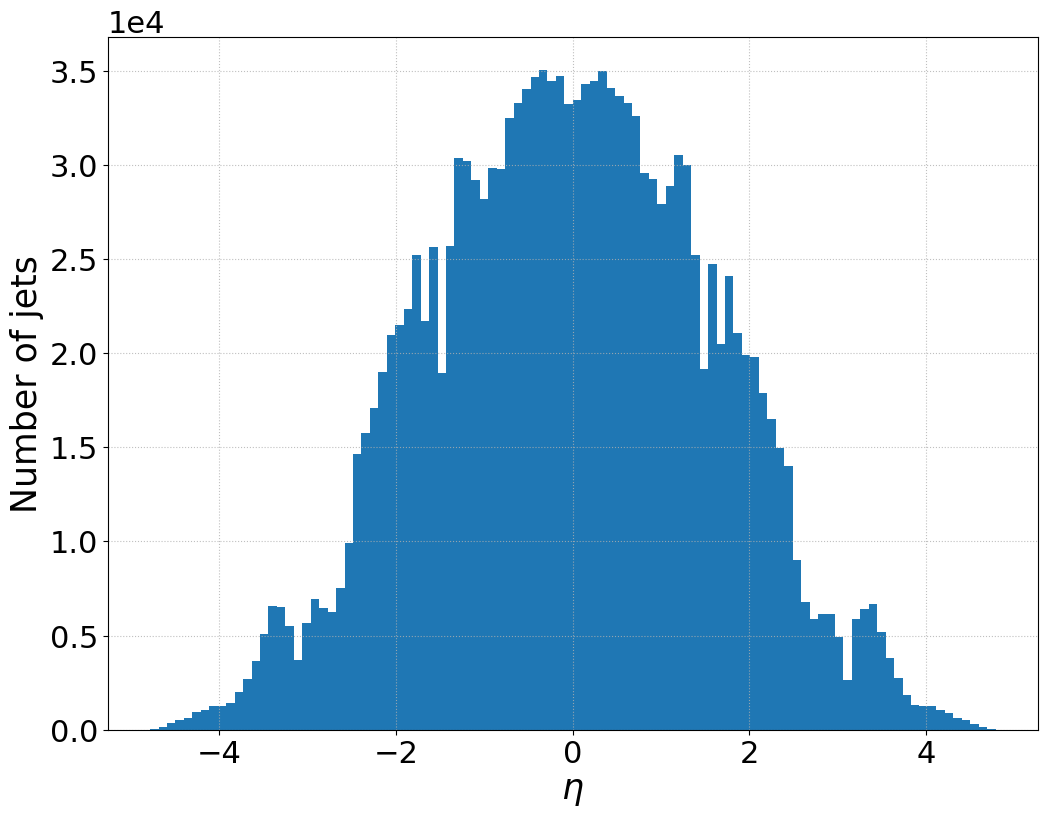

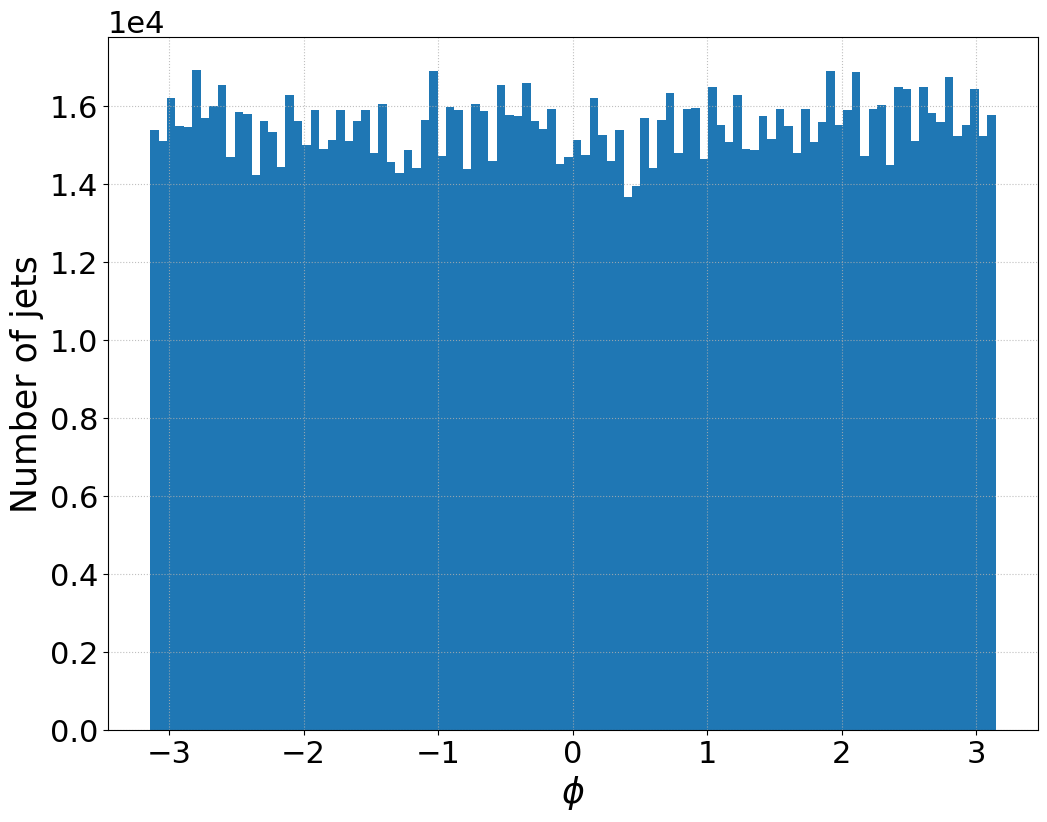

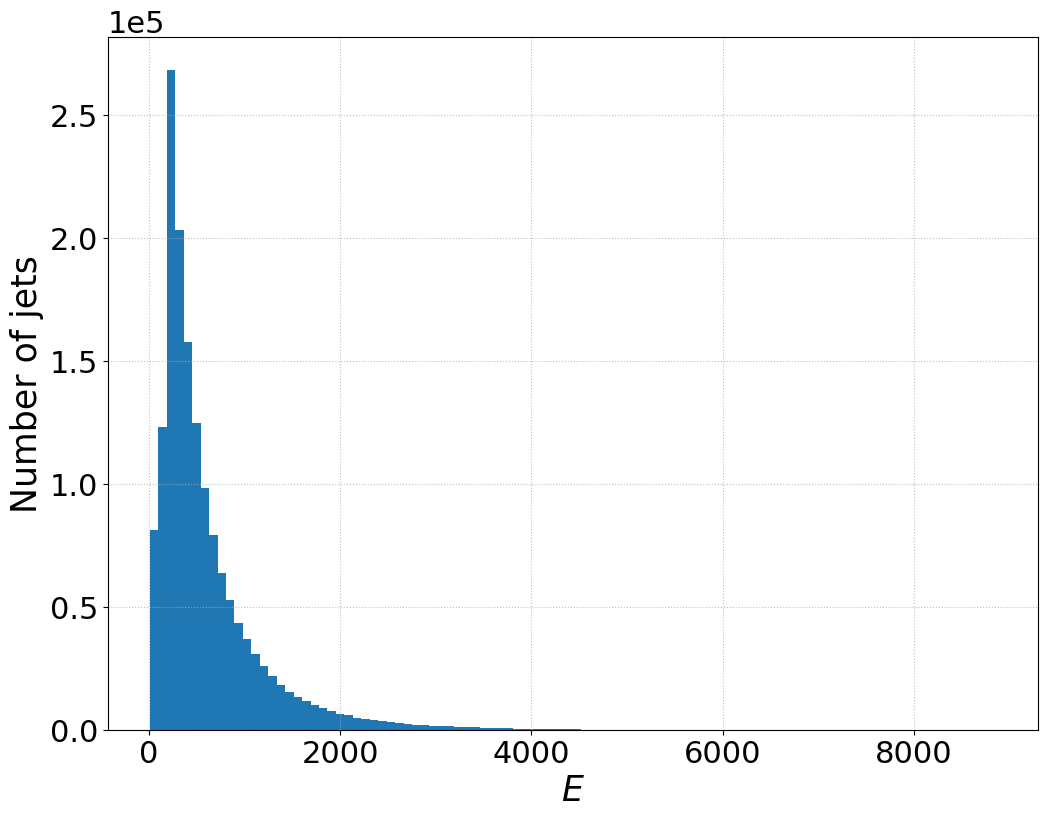

In [12]:
#plot_data(train, pt_range=(0, 1000), e_range=(0,4000), save=True, title=False)
mpl.rc_file('my_matplotlib_rcparams')
plot_data(train, save=True, logy=False, title=False)

In [13]:
train.mean()


pT     226.328629
eta     -0.021716
phi      0.008840
E      596.533386
dtype: float32

In [14]:
train.std()

pT     119.800125
eta      1.594937
phi      1.821444
E      552.267090
dtype: float32

In [15]:
# Normalize
train_mean = train.mean()
train_std = train.std()

train = (train - train_mean) / train_std
test = (test - train_mean) / train_std

In [16]:
train_mean

pT     226.328629
eta     -0.021716
phi      0.008840
E      596.533386
dtype: float32

In [17]:
train_std

pT     119.800125
eta      1.594937
phi      1.821444
E      552.267090
dtype: float32

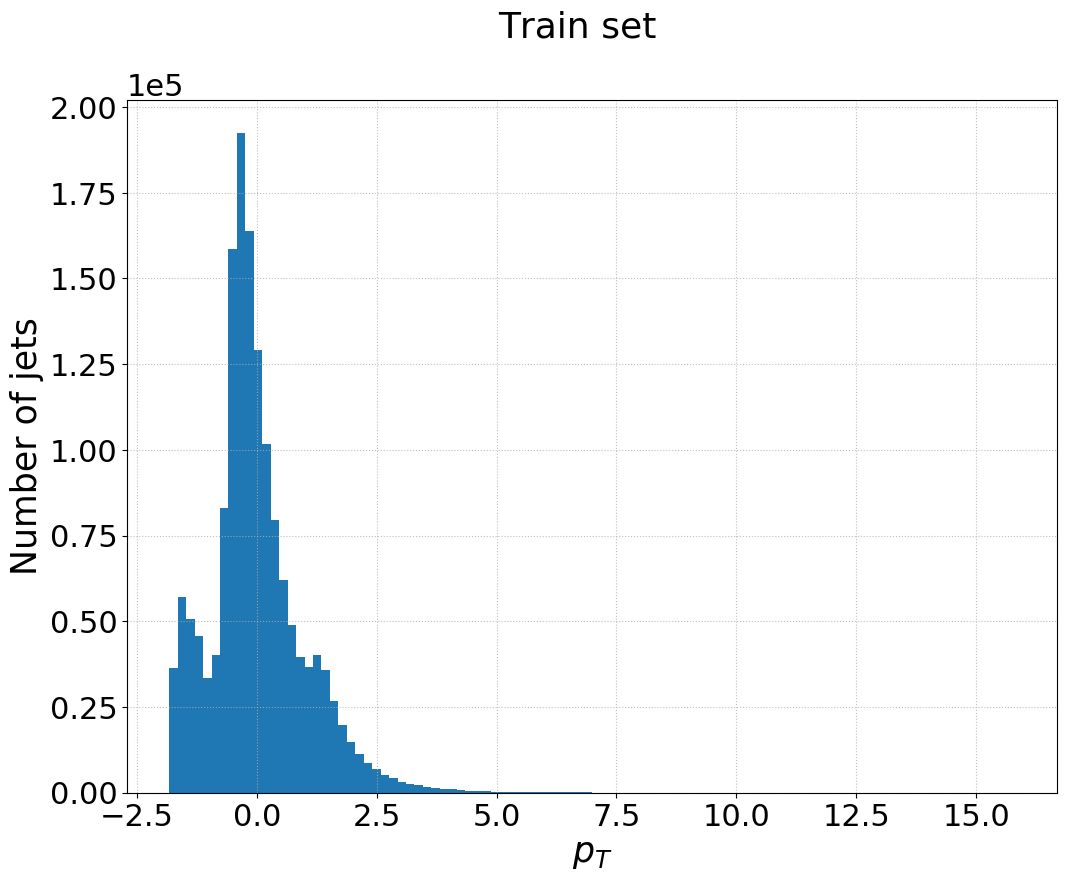

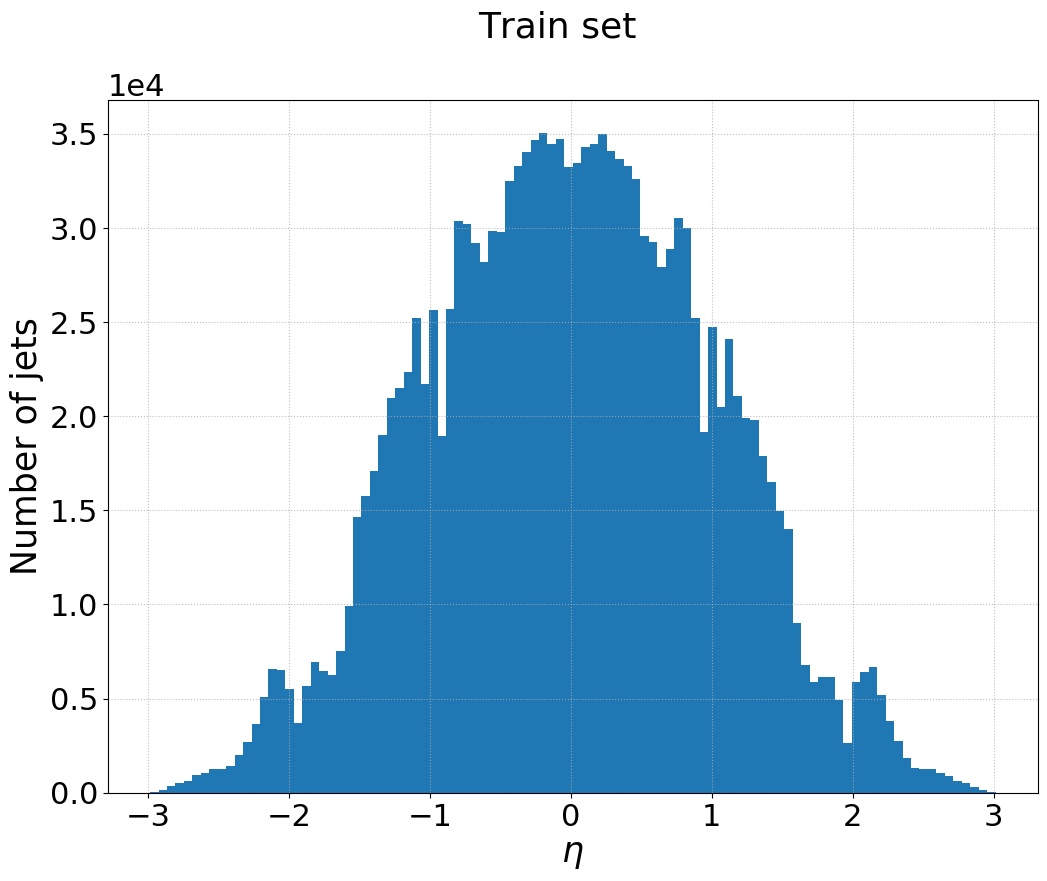

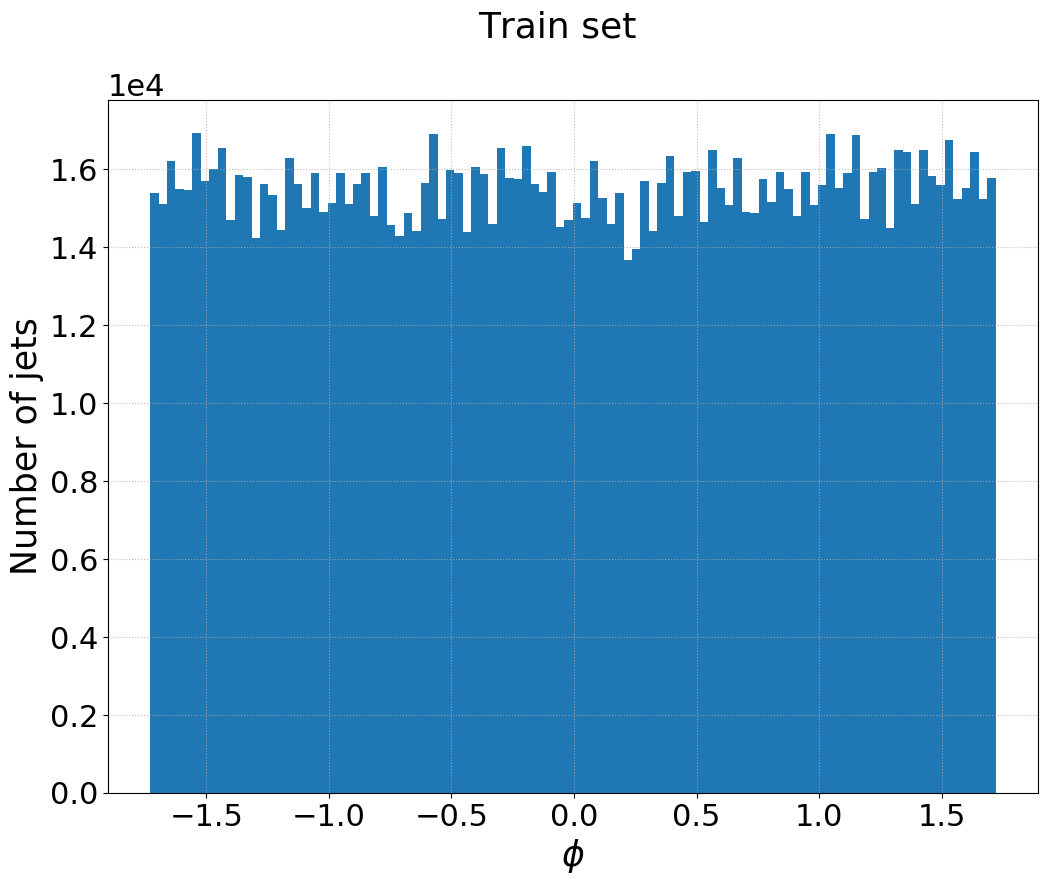

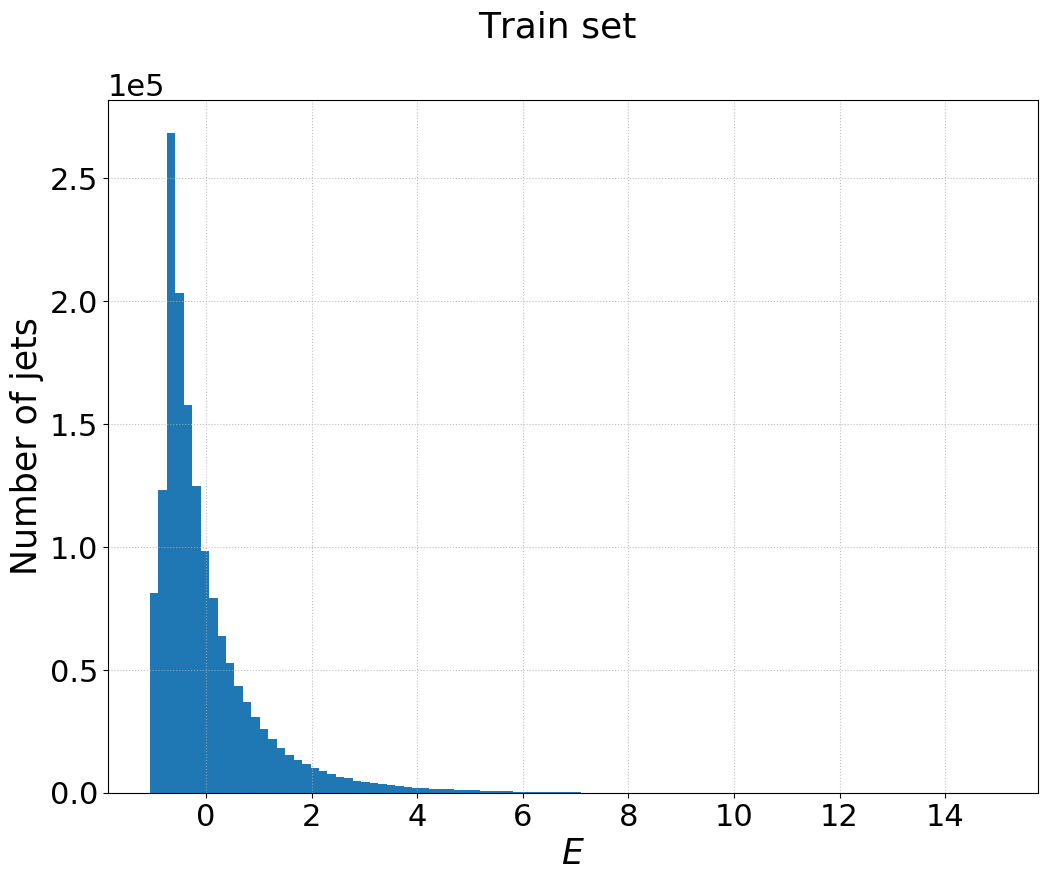

In [18]:
plot_data(train, logy=False, save=True)

In [19]:
test.shape

(387581, 4)

In [20]:
train.shape

(1550319, 4)

In [21]:
1550319 + 387581


1937900